# Q3

In [394]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from queue import Queue

In [395]:
image = cv2.imread('face.jpg')[:,:,::-1]

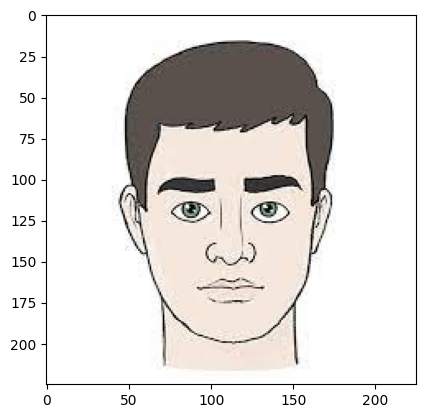

In [396]:
plt.imshow(image)

In [397]:
def get_pixels(image , p , x , y): 
          pixels = []
          if(p[0] +1 < x): 
               pixels.append((p[0] +1 , p[1]))
               if(p[1] +1 < y):
                    pixels.append((p[0] +1 , p[1]+1))
               if(p[1] -1 >= 0): 
                    pixels.append((p[0] +1 , p[1]-1))

          if(p[1] +1 < y): 
               pixels.append((p[0] , p[1] + 1))
               if(p[0] -1 >= 0):
                   pixels.append((p[0]-1 , p[1] + 1))
               
          if(p[1] -1 >= 0 ): 
               pixels.append((p[0] , p[1] - 1)) 
               if(p[0] -1 >=0):
                    pixels.append((p[0]-1 , p[1] - 1)) 
          if(p[0] -1 >= 0): 
               pixels.append((p[0]-1 , p[1] ))    
          return pixels


In [398]:

def diff(x1 , x2): 
     if x1-x2 >= 0: 
          return x1-x2 
     else:
          return -1 * (x1-x2)

In [399]:
import warnings
warnings.filterwarnings("ignore")  
 
def segment(image , t1, t2 , seed , color):
    q = Queue(maxsize = image.shape[0] * image.shape[1])
    segmented_image = image.copy()
    # image = cv2.GaussianBlur(image,(5,5), 0)
    q.put(seed)
    visited = {seed}
    

    rs, gs, bs = image[seed[0],seed[1]] 
    segmented_image[seed[0] , seed[1]] = color
   
    while not q.empty():
            p = q.get()
            pixels = get_pixels(image , p , image.shape[0] , image.shape[1])

            for n in pixels:
                if n not in visited:
                    r , g , b = image[p[0] , p[1] ]
                    ri ,gi, bi = image[n[0] , n[1]]
                    x1 ,x2 ,x3 ,x4 ,x5,x6 = diff(r, ri) , diff(g, gi), diff(b, bi) , diff(ri,rs) , diff(gi, gs) , diff(bi , bs)
                    if (x1 <= t1 and x2 <= t1 and x3 <= t1 and x4 <= t2 and x5 <= t2 and x6 <= t2):
                        segmented_image[n[0] , n[1]] = color
                        visited.add(n)
                        q.put(n)
                        
    return segmented_image

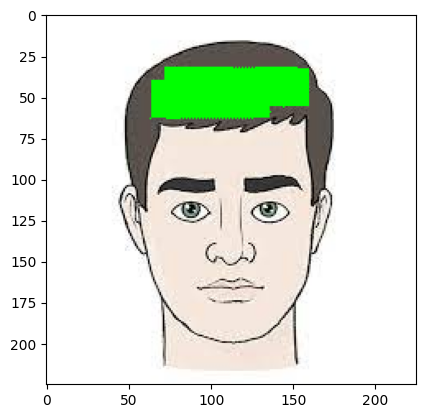

In [400]:
segmented_image = segment(image , 30 , 100 , (40 , 110) , (0,255,0))

plt.imshow(segmented_image)